<a href="https://colab.research.google.com/github/ali-77-gh/Data-Science/blob/main/student_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting student grades with logistic regression**

# **Add required libraries**

In [1]:
import pandas as pd
from google.colab import drive
import numpy as np
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import matplotlib.pyplot as plt


# **Reading data and checking it**

In [90]:
data = pd.read_csv(r'/content/Student_Marks.csv')

In [91]:
data.head(5)


,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [92]:
data.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [93]:
data['marks_log'] = data['Marks'].apply(lambda x:'above35' if x>35 else 'below35')

In [94]:
data.head(5)

,number_courses,time_study,Marks,marks_log
0,3,4.508,19.202,below35
1,4,0.096,7.734,below35
2,4,3.133,13.811,below35
3,6,7.909,53.018,above35
4,8,7.811,55.299,above35


# **Splitting the data and building a logistic regression model**

In [95]:
x_train , x_test , y_train , y_test = train_test_split(data[['time_study']] , data['marks_log'] , test_size=0.3 , random_state=42)

In [96]:
log_model = LogisticRegression()
log_model.fit(x_train , y_train)

LogisticRegression()

In [97]:
y_prd_log = log_model.predict(x_test)

# **Create a new table to compare actual and predicted data**

In [98]:
combined = {"actual":y_test , "predicted":y_prd_log}
result = pd.DataFrame(combined)

In [99]:
result.head()

,actual,predicted
83,below35,below35
53,above35,below35
70,below35,below35
45,below35,below35
44,below35,below35


# **Checking the statistical results and accuracy of the model**

In [100]:
print("Confusion Matrix = \n", confusion_matrix(y_test, y_prd_log))
print("accuracy = " , accuracy_score(y_test , y_prd_log))

precision = precision_score(y_test, y_prd_log, pos_label='above35')
recall = recall_score(y_test, y_prd_log, pos_label='above35')
f1 = f1_score(y_test, y_prd_log, pos_label='above35')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Confusion Matrix = 
 [[ 7  2]
 [ 1 20]]
accuracy =  0.9
Precision: 0.875
Recall: 0.7777777777777778
F1-score: 0.8235294117647058


# **Comparing the graph of the actual data with the predicted one**

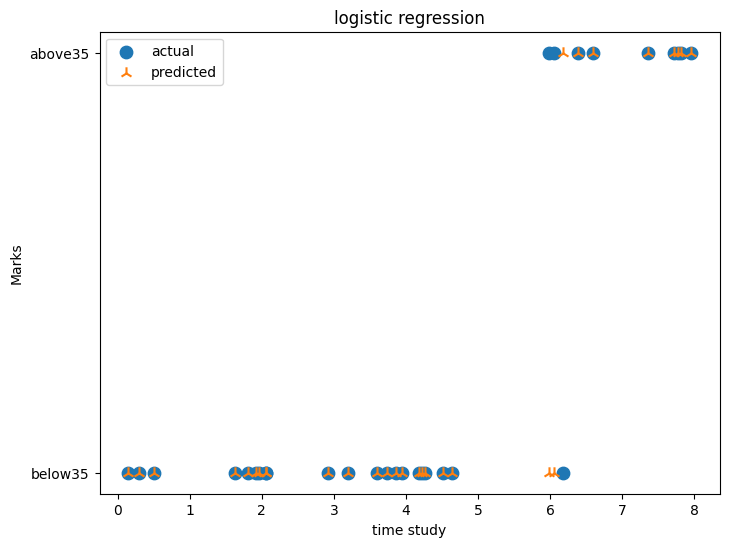

In [101]:

plt.figure(figsize=(8,6))
plt.scatter(x_test , y_test , s=80 , label='actual')
plt.scatter(x_test , y_prd_log , marker='2' , s=80 , label='predicted')
plt.title("logistic regression")
plt.xlabel("time study")
plt.ylabel("Marks")
plt.legend()
plt.show()